In [4]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/andresperez86/vision_cpp/master/init.py
from init import init; init(force_download=False)


##Comandos para traer la base de datos.







In [ ]:
!pip install pyproj

     |████████████████████████████████| 6.5MB 5.4MB/s 


In [ ]:
!mkdir -p ./local/datasets/
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo" -O local/datasets/Dataset_JPV.zip && rm -rf /tmp/cookies.txt

--2021-04-21 19:47:01--  https://docs.google.com/uc?export=download&confirm=z7g8&id=15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo
Resolving docs.google.com (docs.google.com)... 108.177.13.138, 108.177.13.100, 108.177.13.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.13.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-28-docs.googleusercontent.com/docs/securesc/t93t888bfunb3jm47iop8oek5cdf7tbd/bqeafh4r4kskdbsd5pav8p0uraf5vsgf/1619034375000/14059520846711589950/08924134462117284228Z/15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo?e=download [following]
--2021-04-21 19:47:01--  https://doc-0c-28-docs.googleusercontent.com/docs/securesc/t93t888bfunb3jm47iop8oek5cdf7tbd/bqeafh4r4kskdbsd5pav8p0uraf5vsgf/1619034375000/14059520846711589950/08924134462117284228Z/15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo?e=download
Resolving doc-0c-28-docs.googleusercontent.com (doc-0c-28-docs.googleusercontent.com)... 173.194.215.132, 2607:f8b0:400c:c0c::84
Connectin

## Descomprimimos el archivos de dataset

In [ ]:
!unzip -o "./local/datasets/Dataset_JPV.zip" -d Dataset_JPV > /dev/null

mapname:  conversion of  failed


#Importamos las libreria a utilizar 

In [5]:
from local.cpp_algorithms.bcd import bcd
from local.cpp_algorithms.wavefront import wavefront
from local.cpp_algorithms.stc import stc
from local.cpp_algorithms.common_helpers import get_all_area_maps, get_random_coords, get_end_coords
from local.cpp_algorithms.common_helpers import plot, imshow, imshow_scatter

## Extract countour of image 

In [14]:
import numpy as np 
import cv2
import pyproj
from matplotlib import pyplot as plt
import json

In [15]:
#load a image
I=cv2.imread('Dataset_JPV/train/x/img216.jpg',cv2.IMREAD_COLOR)#img72#216
img=cv2.imread('Dataset_JPV/train/y/img216.png',cv2.IMREAD_COLOR)
print(I.shape);type(img);img.shape

(240, 320, 3)


(240, 320, 3)

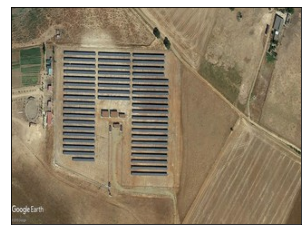

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 None)

In [16]:
Irgb = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.imshow(Irgb)
plt.xticks([]), plt.yticks([]), plt.show()

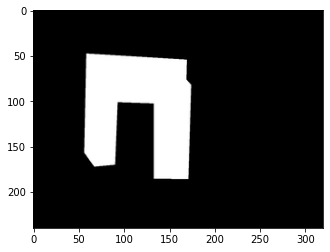

In [17]:
plt.imshow(img)
#plt.xticks([]), plt.yticks([]), plt.show()

In [18]:
img_tre=img[:,:,1]
print(img_tre[:,:].shape)

(240, 320)


In [19]:
# Detecting shapes in image by selecting region  
# with same colors or intensity. 
contours,_=cv2.findContours(img_tre, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

In [20]:
# Searching through every region selected to  
# find the required polygon. 
for cnt in contours : 
    area = cv2.contourArea(cnt) 
   
    # Shortlisting the regions based on there area. 
    if area > 400:  
        approx = cv2.approxPolyDP(cnt, 0.009 * cv2.arcLength(cnt, True), True) 
        cv2.drawContours(img, [approx], 0, (0, 0, 255), 7) 
        # Checking if the no. of sides of the selected region is 7. 

In [21]:
approx.astype(np.float) 
approx.shape

(14, 1, 2)

In [22]:
from google.colab.patches import cv2_imshow

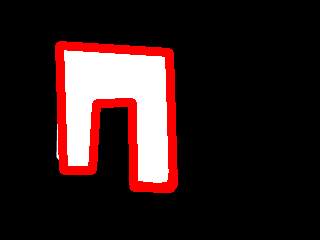

In [23]:
cv2_imshow(img)  

In [27]:
scale_percent=50;
width =  int ( img.shape[1]*scale_percent/100)
height =  int ( img.shape[0]*scale_percent/100)

dsize=(width,height)

output=cv2.resize(img,dsize)
cv2.imwrite('./local/test_maps/img0.png',output)

True

## Crea una ruta de Cobertura

In [28]:
area_maps = get_all_area_maps("./local/test_maps/")   # all area maps in the folder
area_map = area_maps[0]
area_map = area_map
print(area_map)

# ---- Calculate Coverage Path ----
start_point = get_random_coords(area_map, 1)[0]  # returns a random coord not on an obstacle
end_point = get_end_coords(area_map, 1)[0]
print(start_point)
# start_point = (area_map(0),1)
coverage_path_bcd = bcd(area_map, start_point)      # calculate coverage path using bcd
# end_point = coverage_path_bcd[-1]
print(end_point)
print(coverage_path_bcd)

[[-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 ...
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]]
(26, 47)
(89, 83)
[(26, 47), (27, 47), (28, 47), (29, 47), (30, 47), (31, 47), (32, 47), (33, 47), (34, 47), (35, 47), (36, 47), (37, 47), (38, 47), (39, 47), (40, 47), (41, 47), (42, 47), (43, 47), (44, 47), (45, 47), (46, 47), (47, 47), (48, 47), (48, 48), (47, 48), (46, 48), (45, 48), (44, 48), (43, 48), (42, 48), (41, 48), (40, 48), (39, 48), (38, 48), (37, 48), (36, 48), (35, 48), (34, 48), (33, 48), (32, 48), (31, 48), (30, 48), (29, 48), (28, 48), (27, 48), (27, 49), (28, 49), (29, 49), (30, 49), (31, 49), (32, 49), (33, 49), (34, 49), (35, 49), (36, 49), (37, 49), (38, 49), (39, 49), (40, 49), (41, 49), (42, 49), (43, 49), (44, 49), (45, 49), (46, 49), (47, 49), (48, 49), (48, 50), (47, 50), (46, 50), (45, 50), (44, 50), (43, 50), (42, 50), (41, 50), (40, 50), (39, 50), (38, 50), (37, 50), (36, 50), (35, 50), (34, 50), (33, 

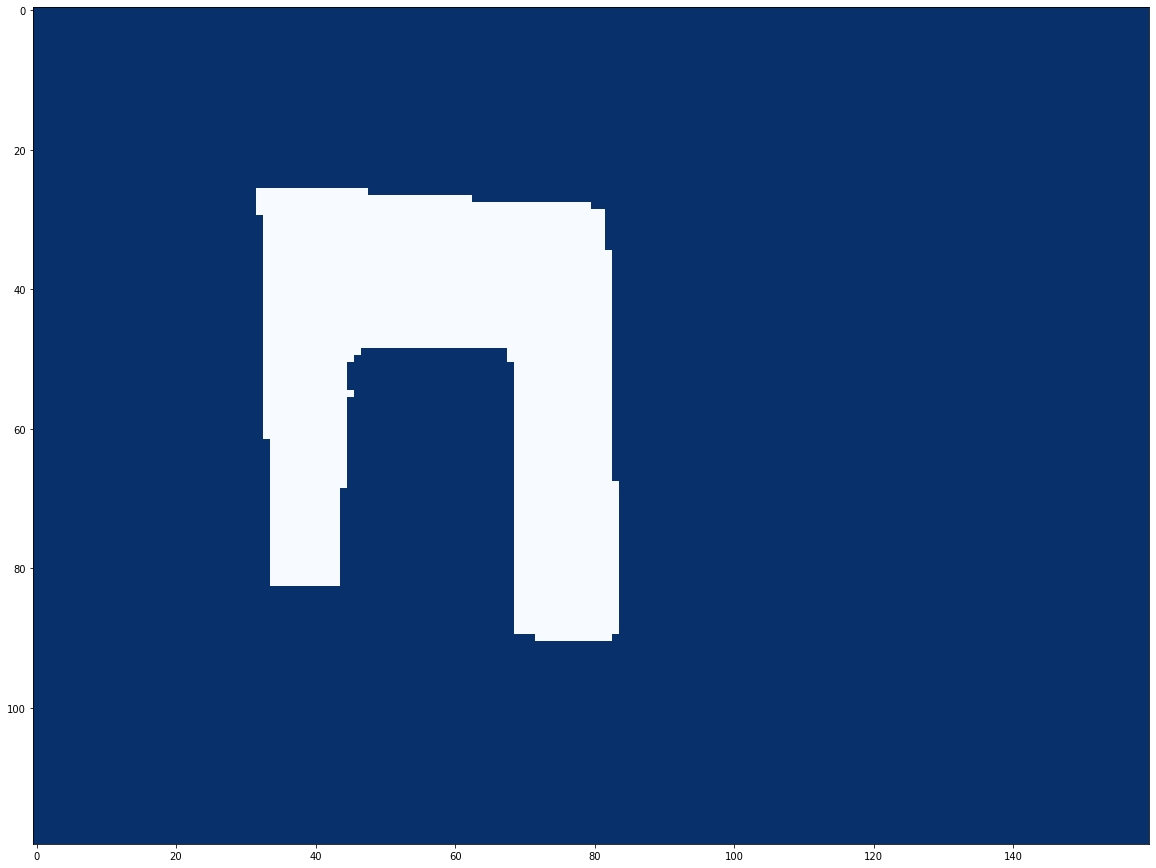

In [32]:
imshow(area_map, figsize=(20, 20), cmap="Blues_r") 

In [36]:
arr=np.array(coverage_path_bcd)
arrfloat=arr.astype(np.float)
print(arrfloat);arrfloat.shape

[[26. 47.]
 [27. 47.]
 [28. 47.]
 ...
 [55. 44.]
 [55. 44.]
 [55. 45.]]


(2328, 2)

## Convierte pixeles a coordenadas 


In [37]:
## Creamos el primer sistema de coordenadas en WGS84
## epsg:4326, http://spatialreference.org/ref/epsg/4326/
p1 = pyproj.Proj(init = "epsg:4326")
## Creamos el segundo sistema de coordenadas en ED50 UTM huso horario 30
## epsg:23030, http://spatialreference.org/ref/epsg/23030/
p2 = pyproj.Proj(init = "epsg:23030")
## Mi posición en WGS84
#lon = -122.45463
#lat = 38.161479#sonoma_raceway position
lon = 47.397742,
lat= 8.545594,
## Transformamos del sistema de coordenadas p1 (WGS84 en grográficas)
## al sistema de coordenadas p1 (ED50, UTM, Z30)
x2, y2 = pyproj.transform(p1, p2, lon, lat)
print (x2, y2)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axi

(6889496.91085045,) (1473033.5345514487,)


In [40]:
x=np.zeros(shape=(arrfloat.shape[0],2))


In [41]:
def trans(ang):
  T=np.array([[np.cos(ang), -np.sin(ang)],
              [np.sin(ang), np.cos(ang)]])
  return T



In [42]:
for i in range(x.shape[0]):
  x[i][0]=x[i][0]+x2
  x[i][1]=x[i][1]+y2



In [43]:
#approxrot=approx.dot(trans(np.deg2rad(45)))#multiplicamos matrix del poligono por la matrix de rotación
#approxfloat=approxrot.reshape(14,2).astype(np.float)
#approx_f=x+approxfloat
approx_f=x+arrfloat


In [44]:
#print(approxfloat); print(x)

In [45]:
for i in range(x.shape[0]):
   approx_f[i][0],approx_f[i][1] =pyproj.transform(p2,p1, approx_f[i][0], approx_f[i][1])
print(approx_f)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  


[[47.39794103  8.5458367 ]
 [47.3979468   8.54583566]
 [47.39795256  8.54583462]
 ...
 [47.3981051   8.54578931]
 [47.3981051   8.54578931]
 [47.39810615  8.54579505]]


In [46]:
#polylist=list(approx_f)   
#listatuplas=[]
#print(polylist)
#for i in polylist:    
#    t=tuple(i)
#    listatuplas.append(t)
#print(listatuplas)

In [47]:
#!pip install geojson

In [48]:
#from geojson import Polygon

In [49]:
#Polygon(listatuplas)

#creando el archivo PLAN

In [50]:
plan={
    "fileType": "Plan",
    "geoFence": {
        "circles": [
        ],
        "polygons": [
        ],
        "version": 2
    },
    "groundStation": "QGroundControl",
}


In [ ]:
del listaItems
del item

In [52]:
rallyPoints={
        "points": [
        ],
        "version": 2
    }

mission=  {
        "cruiseSpeed": 15,
        "firmwareType": 12,
        "hoverSpeed": 5      
    }

plannedHomePosition = [
            47.397742,
            8.545594,
            488
        ]

item  = {
       "AMSLAltAboveTerrain": None,
        "Altitude": 5,
        "AltitudeMode": 0,
        "autoContinue": True,
        "command": 22,
        "doJumpId": 1,
        "frame": 3,
        "params": [
                    0,
                    0,
                    0,
                    None,
                    47.39773941040039,
                    8.5455904006958,
                    5
                ],
                "type": "SimpleItem"
                }

In [53]:
altitud=5
listaItems=[]
item1=item.copy()
for i in range(approx_f.shape[0]):
  #for x,y in item.items():
  item1=item.copy()
  if item1['doJumpId']==1:
    item1['doJumpId']=i
    if i>0:
      item1['command']=16
    #print(i)
  if item1['params'][0]==0:
    item1['params']=[0,0,0,None,approx_f[i][0],approx_f[i][1],altitud]
  print(i)
  listaItems.append(item1)
  print(approx_f.shape[0])
  if i==approx_f.shape[0]-1:
    item2 = {
       "AMSLAltAboveTerrain": None,
        "Altitude": 0,
        "AltitudeMode": 0,
        "autoContinue": True,
        "command": 21,
        "doJumpId": i+1,
        "frame": 3,
        "params": [
                    0,
                    0,
                    0,
                    None,
                    47.39773941040039,
                    8.5455904006958,
                    0
                ],
                "type": "SimpleItem"
                }
    listaItems.append(item2)
print(listaItems)

0
2328
1
2328
2
2328
3
2328
4
2328
5
2328
6
2328
7
2328
8
2328
9
2328
10
2328
11
2328
12
2328
13
2328
14
2328
15
2328
16
2328
17
2328
18
2328
19
2328
20
2328
21
2328
22
2328
23
2328
24
2328
25
2328
26
2328
27
2328
28
2328
29
2328
30
2328
31
2328
32
2328
33
2328
34
2328
35
2328
36
2328
37
2328
38
2328
39
2328
40
2328
41
2328
42
2328
43
2328
44
2328
45
2328
46
2328
47
2328
48
2328
49
2328
50
2328
51
2328
52
2328
53
2328
54
2328
55
2328
56
2328
57
2328
58
2328
59
2328
60
2328
61
2328
62
2328
63
2328
64
2328
65
2328
66
2328
67
2328
68
2328
69
2328
70
2328
71
2328
72
2328
73
2328
74
2328
75
2328
76
2328
77
2328
78
2328
79
2328
80
2328
81
2328
82
2328
83
2328
84
2328
85
2328
86
2328
87
2328
88
2328
89
2328
90
2328
91
2328
92
2328
93
2328
94
2328
95
2328
96
2328
97
2328
98
2328
99
2328
100
2328
101
2328
102
2328
103
2328
104
2328
105
2328
106
2328
107
2328
108
2328
109
2328
110
2328
111
2328
112
2328
113
2328
114
2328
115
2328
116
2328
117
2328
118
2328
119
2328
120
2328
121
2328
122
2328
123

In [54]:
mission['items']=listaItems
mission["plannedHomePosition"]=plannedHomePosition
mission["vehicleType"]=2
mission["version"]=2
plan['mission']=mission
plan['rallyPoints']=rallyPoints
plan['version']=1

with open('cover_missionR1.plan','w') as f:
    json.dump(plan,f)

In [ ]:
for x,y in item.items():
  print(x,y)

In [ ]:
item1['params'][0]

In [ ]:
print(listaItems)

In [ ]:
for i in item:
  print(item[i])